In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100 


In [ ]:
df = pd.read_csv('data/GAMES.csv')
df['date'] = pd.to_datetime(df['game_id'].str.extract(r'(\d{4}-\d{2}-\d{2})')[0])
df['year'] = df['date'].dt.year
df 

,game_id,1_opener_fip,1_opener_freshness,1_others_fip,1_others_freshness,1_woba,1_ooa,1_home,1_team,1_is_wildcard,...,2_others_fip,2_others_freshness,2_woba,w_ooa,2_team,2_is_wildcard,is_playoff,result,date,year
0,ARI_COL_2017-10-04,9.91,NaN,3.552857,25992.0,0.332,21,1,COL,0,...,5.746000,17136.0,0.329,-2,ARI,0,1,0,2017-10-04,2017
1,ARI_LAD_2017-10-06,16.16,NaN,2.460000,26316.0,0.329,-2,1,ARI,0,...,4.160000,12948.0,0.330,-18,LAD,0,1,0,2017-10-06,2017
2,ARI_LAD_2017-10-07,2.71,72.0,3.926667,56.0,0.329,-2,1,ARI,0,...,2.215000,3393.6,0.330,-18,LAD,0,1,0,2017-10-07,2017
3,ARI_LAD_2017-10-09,7.08,120.0,3.470000,60.0,0.329,-2,0,ARI,0,...,2.567500,48.0,0.330,-18,LAD,0,1,0,2017-10-09,2017
4,ARI_LAD_2023-10-07,51.26,8640.0,5.926667,43600.0,0.341,-4,0,LAD,0,...,5.735000,96.0,0.317,35,ARI,0,1,0,2023-10-07,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19777,TOR_WSN_2023-08-29,4.66,144.0,3.706667,72.0,0.309,-2,1,WSN,0,...,3.960000,96.0,0.324,9,TOR,0,0,1,2023-08-29,2023
19778,TOR_WSN_2023-08-30,4.56,120.0,4.460000,72.0,0.324,9,0,TOR,0,...,5.475000,48.0,0.309,-2,WSN,0,0,1,2023-08-30,2023
19779,TOR_WSN_2025-03-31,7.64,13536.0,1.600000,48.0,0.330,20,0,TOR,0,...,9.640000,33.6,0.302,-33,WSN,0,0,1,2025-03-31,2025
19780,TOR_WSN_2025-04-01,5.76,120.0,5.900000,56.0,0.330,20,0,TOR,0,...,7.363333,40.0,0.302,-33,WSN,0,0,1,2025-04-01,2025


## Team Performance Analysis


In [ ]:
team1_df = df[['1_team', 'result', '1_others_fip', '1_woba', '1_ooa']].copy()
team1_df.columns = ['team', 'win', 'fip', 'woba', 'ooa']
team2_df = df[['2_team', 'result', '2_others_fip', '2_woba', 'w_ooa']].copy()
team2_df.columns = ['team', 'win', 'fip', 'woba', 'ooa']
team2_df['win'] = 1 - team2_df['win']
all_teams = pd.concat([team1_df, team2_df])
team_stats = all_teams.groupby('team').agg({
    'win': ['sum', 'count', 'mean'],
    'fip': 'mean',
    'woba': 'mean',
    'ooa': 'mean'
}).round(3)
team_stats.columns = ['wins', 'games', 'win_rate', 'avg_fip', 'avg_woba', 'avg_ooa']
team_stats = team_stats.sort_values('win_rate', ascending=False)
print("Top 10 Teams by Win Rate:")
print(team_stats[team_stats['games'] >= 100].head(10))
print("\nBottom 5 Teams by Win Rate:")
print(team_stats[team_stats['games'] >= 100].tail(5))


Top 10 Teams by Win Rate:
      wins  games  win_rate  avg_fip  avg_woba  avg_ooa
team                                                   
LAD    880   1421     0.619    3.596     0.333   -4.595
HOU    836   1402     0.596    3.598     0.330   26.196
NYY    763   1341     0.569    3.511     0.329   -5.065
CLE    723   1308     0.553    3.554     0.315   15.827
MIL    737   1344     0.548    3.832     0.318   11.395
TBR    731   1337     0.547    3.880     0.318   -0.889
ATL    702   1294     0.543    3.815     0.327    3.913
BOS    720   1328     0.542    3.739     0.330   -9.893
CHC    719   1345     0.535    3.862     0.324   20.884
STL    675   1305     0.517    3.962     0.319   10.434

Bottom 5 Teams by Win Rate:
      wins  games  win_rate  avg_fip  avg_woba  avg_ooa
team                                                   
CHW    578   1292     0.447    3.945     0.306   -7.931
COL    576   1311     0.439    4.267     0.320    2.830
PIT    564   1302     0.433    4.040     0.304   

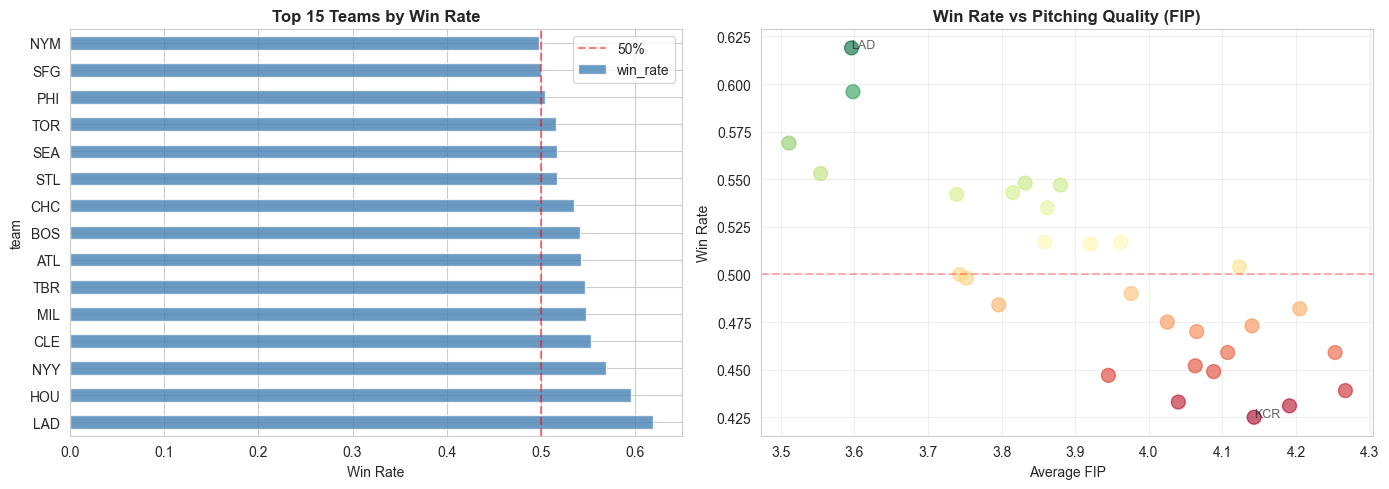

In [41]:
top_teams = team_stats[team_stats['games'] >= 100].head(15)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
top_teams['win_rate'].plot(kind='barh', ax=axes[0], color='steelblue', alpha=0.8)
axes[0].set_title('Top 15 Teams by Win Rate', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Win Rate')
axes[0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='50%')
axes[0].legend()
qualified_teams = team_stats[team_stats['games'] >= 100]
axes[1].scatter(qualified_teams['avg_fip'], qualified_teams['win_rate'], 
                s=100, alpha=0.6, c=qualified_teams['win_rate'], cmap='RdYlGn')
axes[1].set_xlabel('Average FIP')
axes[1].set_ylabel('Win Rate')
axes[1].set_title('Win Rate vs Pitching Quality (FIP)', fontsize=12, fontweight='bold')
axes[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.3)
axes[1].grid(alpha=0.3)
for idx in [0, -1]: 
    team = qualified_teams.index[idx]
    x = qualified_teams.iloc[idx]['avg_fip']
    y = qualified_teams.iloc[idx]['win_rate']
    axes[1].annotate(team, (x, y), fontsize=9, alpha=0.7)
plt.tight_layout()
plt.show()


## Team Matchup Patterns


In [35]:
# Most common matchups
df['matchup'] = df.apply(lambda x: '_vs_'.join(sorted([x['1_team'], x['2_team']])), axis=1)
matchup_counts = df['matchup'].value_counts().head(20)

print("Top 20 Most Common Matchups:")
for i, (matchup, count) in enumerate(matchup_counts.items(), 1):
    teams = matchup.split('_vs_')
    print(f"{i:2d}. {teams[0]:3s} vs {teams[1]:3s}: {count:3d} games")


Top 20 Most Common Matchups:
 1. LAD vs SDP: 157 games
 2. HOU vs TEX: 153 games
 3. LAD vs SFG: 153 games
 4. TBR vs TOR: 150 games
 5. ARI vs COL: 149 games
 6. SEA vs TEX: 149 games
 7. NYY vs TBR: 149 games
 8. HOU vs SEA: 149 games
 9. CHC vs PIT: 149 games
10. ARI vs LAD: 149 games
11. CIN vs MIL: 149 games
12. MIL vs PIT: 148 games
13. HOU vs OAK: 148 games
14. BOS vs TOR: 147 games
15. LAA vs TEX: 147 games
16. OAK vs SEA: 147 games
17. LAA vs OAK: 147 games
18. NYY vs TOR: 147 games
19. HOU vs LAA: 147 games
20. DET vs KCR: 147 games
